In [39]:
import numpy as np
import pandas as pd
import pymongo
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from config import config

In [40]:
def read_mongo(collection, query={}):
    """ Read from Mongo and Store into DataFrame """

    # Make a query to the specific DB and Collection
    cursor = collection.find(query)
    
    elements = []
    for doc in cursor:
        del doc['_id']
        elements.append(doc)
        
    # Expand the cursor and construct the DataFrame
    df =  pd.DataFrame(elements)
    
    return df

In [41]:
REPO = 'jabref/jabref'

In [42]:
mongoClient = pymongo.MongoClient(config['DATABASE']['CONNECTION_STRING'])
db = mongoClient[config['DATABASE']['NAME']]
collection = db[f'{REPO}_results']

lastIssue = collection.find().sort('number', -1).limit(1)[0]['number']

df = read_mongo(collection, {'number': {'$gte': lastIssue - 6000}})
df.head()

,compare,filtros,number,tecnica,topk,acertos,arquivos,arquivos_resolvidos_de_verdade,arquivos_sugeridos,data,erros,issue,mapk,max_sim,mediana_sim,min_sim,repositorio
0,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",3897,tfidf,3,0,1,[external-libraries.txt],"[CHANGELOG.md, src/main/java/org/jabref/gui/co...",2018-04-03T12:30:08Z,4,license of external libraries not exact enough,0.000000,0.145595,0.000000,0.000000,jabref/jabref
1,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",3930,tfidf,3,0,5,[src/main/java/org/jabref/gui/importer/fetcher...,"[external-libraries.txt, CHANGELOG.md, src/mai...",2018-04-16T14:45:03Z,4,IEEE transitions to HTTPS,0.000000,0.000000,0.000000,0.000000,jabref/jabref
2,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",3971,tfidf,3,1,5,"[CHANGELOG.md, src/main/java/org/jabref/logic/...","[CHANGELOG.md, src/main/java/net/sf/jabref/gui...",2018-04-29T12:18:50Z,18,Add RFC Standard Fetcher,0.133333,0.218712,0.178891,0.166119,jabref/jabref
3,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",4024,tfidf,3,0,3,"[CHANGELOG.md, src/main/java/org/jabref/gui/en...","[CHANGELOG, src/main/java/net/sf/jabref/Previe...",2018-06-07T08:01:32Z,5,New Entry does no longer focus on first field ...,0.000000,0.208895,0.203644,0.172703,jabref/jabref
4,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",4025,tfidf,3,0,1,[src/main/java/org/jabref/gui/groups/GroupTree...,"[CHANGELOG.md, src/main/java/org/jabref/gui/Ba...",2018-06-13T15:51:01Z,4,Groups are focused on right-click,0.000000,0.224294,0.146922,0.137576,jabref/jabref


In [43]:
tfidf = df[(df['tecnica'] == 'tfidf') & ((df['topk'] == 3) | (df['topk'] == 5))]
sbert = df[(df['tecnica'] == 'sbert') & ((df['topk'] == 3) | (df['topk'] == 5))]
word2vec = df[(df['tecnica'] == 'word2vec') & ((df['topk'] == 3) | (df['topk'] == 5))]

<AxesSubplot: xlabel='topk', ylabel='mapk'>

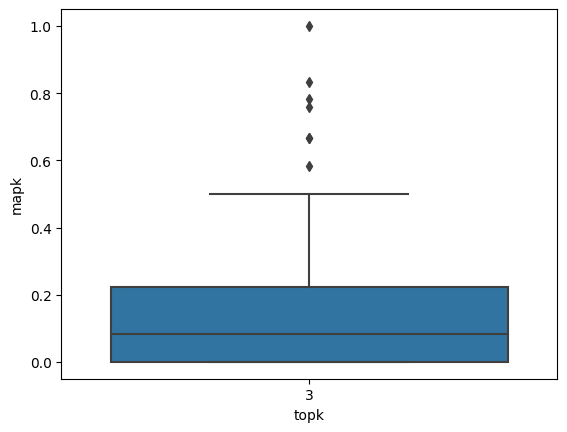

In [44]:
sns.boxplot(x=sbert["topk"], y=sbert["mapk"])

<AxesSubplot: xlabel='topk', ylabel='mapk'>

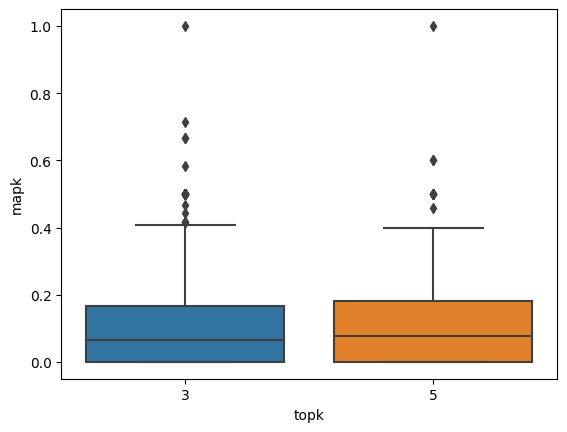

In [45]:
sns.boxplot(x=word2vec["topk"], y=word2vec["mapk"])

<AxesSubplot: xlabel='topk', ylabel='mapk'>

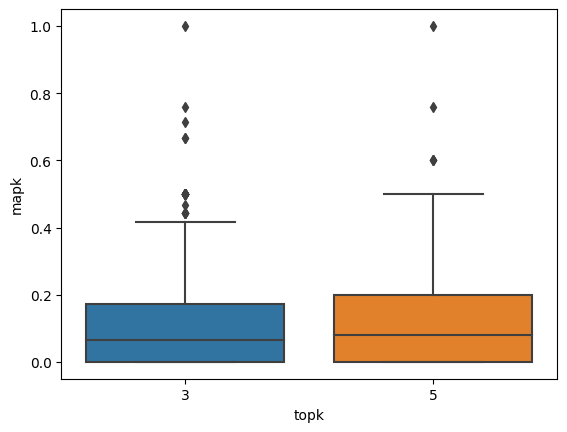

In [46]:
sns.boxplot(x=tfidf["topk"], y=tfidf["mapk"])

In [47]:
stats.kruskal(sbert[sbert['topk'] == 3]['mapk'], sbert[sbert['topk'] == 5]['mapk'])

KruskalResult(statistic=nan, pvalue=nan)

In [48]:
stats.kruskal(word2vec[word2vec['topk'] == 3]['mapk'], word2vec[word2vec['topk'] == 5]['mapk'])

KruskalResult(statistic=0.39822776356462325, pvalue=0.5280059356597485)

In [49]:
stats.kruskal(tfidf[tfidf['topk'] == 3]['mapk'], tfidf[tfidf['topk'] == 5]['mapk'])

KruskalResult(statistic=0.8485438278899857, pvalue=0.35696460841233135)